In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# regression analysis
import statsmodels.api as sm
from scipy import stats

# applications
import pandas as pd

In [2]:
# pyplot colors
dcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

---
## Descriptive Statistics

### Mean (expectation):
$$
\begin{align}
    \bar{y} &= \sum_{i=1}^n \frac{y_i}{n} = \frac{y_1}{n} + \frac{y_2}{n} + ... \frac{y_n}{n} \\
    &= \frac{1}{n}(y_1 + y_2 + ... + y_n) \\
    &=\frac{1}{n} \sum_{i=1}^n y_i
\end{align}
$$

### Variance:
$$
\begin{align}
    \sigma^2_y &= \sum_{i=1}^n \frac{(y_i - \bar{y})^2 }{n}
\end{align}
$$

Standard deviation: $\sigma_y = \sqrt{var(y)}$


### Covariance:
$$
\begin{align}
    cov(y, x) = \sigma_{y,x} = \frac{1}{n} \sum_{i=1}^n (y_i - \bar{y})(x_i - \bar{x})
\end{align}
$$

Correlation:
$\rho_{x, y} = cov(y, x) / (\sigma_y \sigma_x)$

### Optimization


**Claim:** $\bar{z}$ which maximizes $f(z)$ has $f'(z)= 0$.

`Proof`

* If positive slope at $\bar{z}$, move $+dz$ to the right and get higher $\implies$ not maximum.

* If negative slope at $\bar{z}$, move $-dz$ to left and get higher $\implies$ not maximum.

---

**Claim:** $\bar{z}$ which minimizes $f(z)$ has $f'(z)= 0$.

`Proof`

* If positive slope at $\bar{z}$, move $-dz$ (to left) and get lower $\implies$ not maximum.

* If negative slope at $\bar{z}$, move $dz$ (to right) and get lower $\implies$ not maximum.

---
## OLS: Ordinary Least Squares

Standard squared error
$$
\hat{y}_i = \beta_1 x_i + \beta_0
$$

$$
\begin{align}
    \min_{\beta_1, \beta_0}{SSE} &= \sum_{i=1}^n (y_i - \hat{y}_i)^2 \\
    &= \sum_{i=1}^n (y_i - (\beta_1 x_i + \beta_0))^2
\end{align}
$$

## Simple Linear Regression with OLS


$$
\begin{align}
    \hat{y} &= \beta x + \alpha
\end{align}
$$

Solutions for $\beta, \alpha$ given by
$$
\begin{align}
    \beta &= \frac{cov(y, x)}{var(x)} = \frac{\sigma_{yx}^2}{\sigma_{x}^2} \\
    \alpha &= \bar{y} - \beta{\bar{x}}
\end{align}
$$

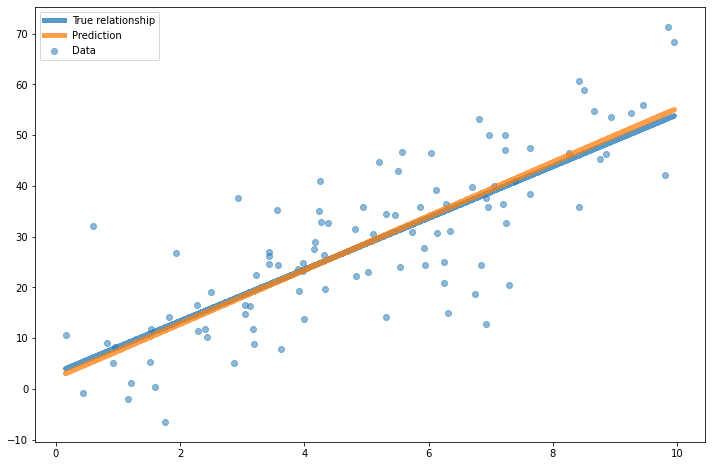

In [3]:
np.random.seed(123)

## Data

# number of a
n = 100

# observed data (random generation)
X = np.random.rand(n) * 10

# true relationship parameters
m = np.random.normal(3, 1)
b = np.random.normal(3, 1)

# true relationship
true_Y = m * X + b

# observed relationship with noise
noise = np.random.normal(0, 10, n)
Y = true_Y + noise


## Observation

# plot formatting
fig, ax = plt.subplots(figsize=(12, 8))

# plot data and "true" relationship
ax.scatter(X, Y, alpha=0.5, label='Data')
ax.plot(X, true_Y, lw=5, alpha=0.75, label='True relationship')


## Prediction

# linear model
y_bar = Y.sum()/n
x_bar = X.sum()/n

var_x = (X - x_bar) @ (X - x_bar) / n
sigma_xy = (Y - y_bar) @ (X - x_bar) / n

# estimated coefficient and intercept
beta = sigma_xy / var_x
alpha = y_bar - beta * x_bar

# prediction
Y_hat = beta * X + alpha

# plot prediction
ax.plot(X, Y_hat, lw=5, alpha=0.75, label="Prediction")

ax.legend()
plt.show()

# Regression Analysis

In [4]:
model_X = sm.add_constant(X)

est = sm.OLS(Y, model_X, hasconst=True).fit()

summary = est.summary()
display(est.params)
display(summary)

array([2.18109437, 5.30893247])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     181.1
Date:                Wed, 05 May 2021   Prob (F-statistic):           5.35e-24
Time:                        21:19:26   Log-Likelihood:                -367.91
No. Observations:                 100   AIC:                             739.8
Df Residuals:                      98   BIC:                             745.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1811      2.203      0.990      0.324      -2.190       6.552
x1             5.3089      0.395     13.456      0.000       4.526       6.092
==============================================================================
Omnibus:                        0.441   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.802   Jarque-Bera (JB):                0.153
Skew:                          -0.072   Prob(JB):                        0.926
Kurtosis:                       3.126   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Standard Error: https://en.wikipedia.org/wiki/Simple_linear_regression#Model-based_properties


In [5]:
# sum of squared errors
sse = (Y - Y_hat) @ (Y - Y_hat)/n

# sum of squared regression
ssr = (Y_hat - y_bar) @ (Y_hat - y_bar)/n

# sum of squared total
sst = (Y - y_bar) @ (Y - y_bar)/n

# r-squared
r_sq = ssr/sst

print(f'SSE \t = {sse:.2f}')
print(f'SSR \t = {ssr:.2f}')
print(f'SST \t = {sst:.2f}')

print(f'\nR^2 \t = SSR/SST = 1-(SSE/SST)')
print(f'\t = {ssr/sst:.2f}')
print('\n', '-'*65)

# deviations in x from mean
X_dev = X - x_bar

# standard error
beta_se = np.sqrt(sse/(n-2)) / np.sqrt(X_dev@X_dev)
alpha_se = beta_se * np.sqrt(X@X/n)

# t-statistic
beta_tstat = beta / beta_se
alpha_tstat = alpha / alpha_se

# p-value from t-distribution cdf
beta_pval = 1-stats.t.cdf(beta_tstat, df=n-1)
alpha_pval = 1-stats.t.cdf(alpha_tstat, df=n-1)

# print results
print('\t coeff \t\t se \t\t t-stat \t p-val')
print(f'alpha: \t {alpha:.6f} \t {alpha_se:.6f} \t {alpha_tstat:.6f} \t {alpha_pval:.6f}')
print(f'beta: \t {beta:.6f} \t {beta_se:.6f} \t {beta_tstat:.6f} \t {beta_pval:.6f}')

SSE 	 = 91.86
SSR 	 = 169.71
SST 	 = 261.56

R^2 	 = SSR/SST = 1-(SSE/SST)
	 = 0.65

 -----------------------------------------------------------------
	 coeff 		 se 		 t-stat 	 p-val
alpha: 	 2.181094 	 0.220259 	 9.902411 	 0.000000
beta: 	 5.308932 	 0.039455 	 134.555725 	 0.000000


https://en.wikipedia.org/wiki/Student%27s_t-distribution

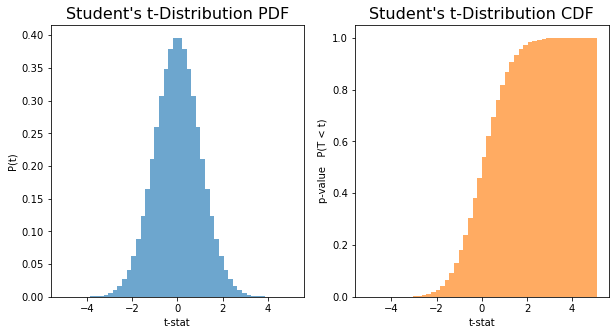

In [6]:
# illustration of student's t-distribution

# linear t-space
t_space = np.linspace(-5, 5)
d_free = n-2

# probability density and cumulative distribution functions
pdf_space = stats.t.pdf(t_space, df=d_free)
cdf_space = stats.t.cdf(t_space, df=d_free)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# bar increments
incr = t_space[1]-t_space[0]
fmt = dict(width=incr, alpha=0.65)

axes[0].bar(t_space, pdf_space, color=dcolors[0], **fmt)

axes[0].set_title('Student\'s t-Distribution PDF', fontsize=16)
axes[0].set_xlabel('t-stat')
axes[0].set_ylabel('P(t)')

axes[1].bar(t_space, cdf_space, color=dcolors[1], **fmt)

axes[1].set_title('Student\'s t-Distribution CDF', fontsize=16)
axes[1].set_xlabel('t-stat')
axes[1].set_ylabel('p-value   P(T < t)')

plt.show()

In [7]:
class OLS:
    
    def __init__(self, X, Y):
        
        self.Y = Y
        self.X = X
        self.n = len(self.Y)
        
        if len(self.X) != self.n:
            raise Exception("Y, X mismatch dimensions")
    
        # mean
        self.y_bar = self.Y.sum() / self.n
        self.x_bar = self.X.sum() / self.n
        
        # deviations
        Y_dev = self.Y - self.y_bar
        X_dev = self.X - self.x_bar
        
        # variance
        self.y_var = Y_dev @ Y_dev / self.n
        self.x_var = X_dev @ X_dev / self.n
        
        # covariance
        self.cov_xy = Y_dev @ X_dev / self.n
        
        # alpha, beta
        self.beta = self.cov_xy / self.x_var
        self.alpha = self.y_bar - self.beta * self.x_bar
        
        # prediction
        self.Y_hat = self.beta * self.X + self.alpha
    
        
        # regression analysis
        self.sse = (self.Y - self.Y_hat) @ (self.Y - self.Y_hat) / n
        self.sst = (self.y_bar - self.Y_hat) @ (self.y_bar - self.Y_hat) / n
        
        self.r_sq = 1 - self.sse / self.sst
        
        
        # standard error
        self.b_se = np.sqrt(sse/(n-2)) / np.sqrt(X_dev@X_dev)
        self.a_se = self.b_se * np.sqrt(X@X/n)

        # t-statistic
        self.b_tstat = self.beta / self.b_se
        self.a_tstat = self.alpha / self.a_se

        # p-value from t-distribution cdf
        self.b_pval = 1-stats.t.cdf(self.b_tstat, df=n-1)
        self.a_pval = 1-stats.t.cdf(self.a_tstat, df=n-1)
        
    def __repr__(self):
        
        return "<Simple Linear Regression>"
    
    def plot(self):
        
        plt.figure(figsize=(8, 5))
        
        # plot data
        plt.scatter(self.X, self.Y,
                    label="Data",
                    alpha=0.5)
        
        # plot prediction
        plt.plot(self.X, self.Y_hat,
                 label="Prediction",
                 alpha=0.65, lw=5, c=dcolors[1])
        
        plt.legend(fontsize=14)
        plt.show()
        
    def summary(self):
        
        # print results
        print('\t coeff \t\t se \t\t t-stat \t p-val')
        
        a_stats = [self.alpha, self.a_se, self.a_tstat, self.a_pval]
        b_stats = [self.beta , self.b_se, self.b_tstat, self.b_pval]
        a = ' \t '.join([f'{x:.6f}' for x in a_stats])
        b = ' \t '.join([f'{x:.6f}' for x in b_stats])
        
        print(f'alpha: \t ' + a)
        print(f'beta: \t ' + b)

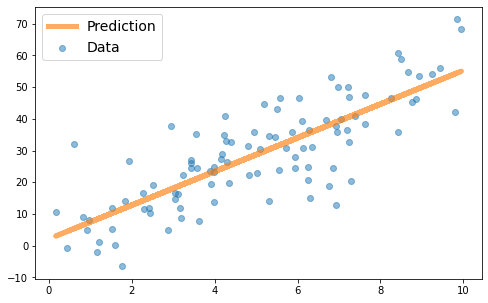

	 coeff 		 se 		 t-stat 	 p-val
alpha: 	 2.181094 	 0.220259 	 9.902411 	 0.000000
beta: 	 5.308932 	 0.039455 	 134.555725 	 0.000000


In [8]:
# show
self = OLS(X, Y)

self.plot()

self.summary()

---
## Gradient Descent

Standard squared error
$$
\hat{y}_i = \beta x_i + \alpha
$$

Ordinary least squares:
$$
\begin{align}
    \min_{\beta, \alpha}{SSE}
    &= \sum_{i=1}^n (y_i - \hat{y}_i)^2 \\
    &= \sum_{i=1}^n (y_i - (\beta x_i + \alpha))^2
\end{align}
$$

Derivative w.r.t. $\beta$:
$$
\begin{align}
    \frac{\partial SSE}{\partial \alpha}
    &= \sum_{i=1}^n 2 (y_i - \hat{y}_i) \\
    \frac{\partial SSE}{\partial \beta}
    &= \sum_{i=1}^n -2 (y_i - \hat{y}_i) x_i
\end{align}
$$

In [9]:
# learning rate
learning_rate = 1e-5
n_iter = 100_000
convergence_limit = 1e-10

# initialize
a_hat = 0
b_hat = 0

# prediction
pred = b_hat * X + a_hat

# error
L = (Y - pred) @ (Y - pred)


# iterate
for i in range(n_iter):
    
    L_prev = L
    
    # parameter derivatives
    dL_da = -2 * (Y - pred).sum()
    dL_db = -2 * ((Y - pred)*X).sum()
    
    # move away from steepest ascent
    a_hat -= dL_da * learning_rate
    b_hat -= dL_db * learning_rate
    
    # update prediction
    pred = b_hat * X + a_hat
    
    # update error
    L = (Y - pred)@(Y - pred)
    
    dL = L - L_prev
    if 0 < dL < convergence_limit:
        
        print("Convergence reached")
        print(f"Change in error: {dL:.2e}")
        
        break
        

print('-' * 20)
print(f"{i+1} iterations\n")

# parameter estimates
print(f"alpha: \t {a_hat : .2f}")
print(f"beta: \t {b_hat : .2f}")

# model evaluation
sst = (Y - y_bar) @ (Y - y_bar)
r_sq = 1 - L / sst

print(f"\nSSE: \t {L/len(Y) : .2f}")
print(f"R sq: \t {r_sq : .2f}")

Convergence reached
Change in error: 1.82e-12
--------------------
30941 iterations

alpha: 	  2.18
beta: 	  5.31

SSE: 	  91.86
R sq: 	  0.65


# Application: CAPM

In [10]:
# get data